# Quantum Bayesian Decisions

A Bayesian Network will be used in a decision problem. The Network will be as simple as possible, containing only 3 binary variables. The first is the evidence variable(L), another one the action variable(A) and the last which depend on the first 2 is the result variable(R). Every variable/node has a conditional probability table which maps the dependencies between them. The agent will use the network to decide which is the best actions to take knowing the evidence that he obtains.

![Title](Rede.png)
![Title](CPTs.png)

The agent only needs to perform the next to equations to know which is the best action to take:
$$ $$
$$EU(a|e)= \sum_{S} P(Result=s|a,e)*U(s)$$
$$action=argmax_a EU(a|e)$$

The action will be obtained by a process described in the auxiliary documentation. To confirm that this process is doing what is expected, the results for this problem are determined :

-First, we will assume action $a_0$ when variable A is false and $a_1$ when true;

-The evidence variable L takes value False;

The utility function is given by the following values:
$$U(R)\left\{
	\begin{array}{ll}
	7 & R=True\\
    3 & R=False \\
	\end{array} 
	\right.$$

Given this the expected utilities of the actions are:

$$EU(a_0)= P(R=True| L=False,A=False)*U(R=True) +  P(R=False| L=False,A=False)*U(R=False)$$
$$EU(a_0)=\dfrac{3}{5}*7+\dfrac{2}{5}*3=5,4$$
In percentage of the total utility of the actions:
$$EU(a_0)\approx 58\%$$


$$EU(a_1)= P(R=True| L=False,A=True)*U(R=True) +  P(R=False| L=False,A=True)*U(R=False)$$
$$EU(a_1)=\dfrac{1}{5}*7+\dfrac{4}{5}*3=3,8$$
In percentage of the total utility of the actions:
$$EU(a_1)\approx 42\%$$


These percentages are the relationships in that we should sample the actions with the used technique.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

/home/michael/anaconda3/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


In [2]:
from qiskit import IBMQ
IBMQ.enable_account('1657029970d40f6aca619ea0b546e547c280ce69242dd4ba534f94a6edfc1972cbc329d1b859e876c89f82996eae0b976c91980d5c7bc6f9e141cfd56491eb92',
                    url='https://q-console-api.mybluemix.net/api',
                    hub='ibm-q-academic',
                    group='univ-minho',
                    project='quantalab')

## Preparation of the Quantum Registers (L=0,A=1,R=2,U=3)

In [3]:
q_v = QuantumRegister(4, name='qv')
q_ext = QuantumRegister(14, name='qext')
c_v = ClassicalRegister(4)
c_ext = ClassicalRegister(14)

circuit = QuantumCircuit(q_v,q_ext,c_v, c_ext)

## Preparation of the state of the Bayesian Network 

In [4]:
#Variable L
circuit.u3(1.23,0,0,q_v[0])

#Variable A
circuit.h(q_v[1])

#Variable R
circuit.ccx(q_v[0],q_v[1],q_ext[0])
circuit.cu3(1.71,0,0,q_ext[0],q_v[2])
circuit.ccx(q_v[0],q_v[1],q_ext[0])
circuit.barrier(q_v,q_ext)

circuit.x(q_ext[1])
circuit.cx(q_v[0],q_ext[1])
circuit.ccx(q_ext[1],q_v[1],q_ext[2])
circuit.cu3(0.927,0,0,q_ext[2],q_v[2])
circuit.ccx(q_ext[1],q_v[1],q_ext[2])
circuit.cx(q_v[0],q_ext[1])
circuit.x(q_ext[1])

circuit.barrier(q_v,q_ext)

circuit.x(q_ext[3])
circuit.cx(q_v[1],q_ext[3])
circuit.ccx(q_v[0],q_ext[3],q_ext[4])
circuit.cu3(0.722,0,0,q_ext[4],q_v[2])
circuit.ccx(q_v[0],q_ext[3],q_ext[4])
circuit.cx(q_v[1],q_ext[3])
circuit.x(q_ext[3])

circuit.barrier(q_v,q_ext)

circuit.x(q_ext[5])
circuit.x(q_ext[6])
circuit.cx(q_v[0],q_ext[5])
circuit.cx(q_v[1],q_ext[6])
circuit.ccx(q_ext[5],q_ext[6],q_ext[7])
circuit.cu3(1.77,0,0,q_ext[7],q_v[2])
circuit.ccx(q_ext[5],q_ext[6],q_ext[7])
circuit.cx(q_v[1],q_ext[6])
circuit.cx(q_v[0],q_ext[5])
circuit.x(q_ext[6])
circuit.x(q_ext[5])

circuit.barrier(q_v,q_ext)

## Preparation of the Utility function 

In [5]:
circuit.u3(2,0,0,q_v[3])
circuit.barrier(q_v,q_ext)

## Application of the Utility function(Grover)

Grover's algorithm will be performed. The number of iterations needed to obtain the pretended state with the greatest probability is obtained using the equation:
$$\sin^2\left( \Big( r + \frac{1}{2} \Big)\theta\right)$$

Knowing that the value os $\theta=1,17 rad$ , after 1 iteration we obtain the pretended state with $96,6\%$ of certainty. To get a greater value k would be a rational number and only an integer number of iterations can be performed.

In [6]:
######################################
### Oracle for 0000,0011,0100,1110 ###
######################################

#0000
circuit.x(q_v[0])
circuit.x(q_v[1])
circuit.x(q_v[2])
circuit.x(q_v[3])

circuit.cu1(pi/4, q_v[0], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(-pi/4, q_v[1], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(pi/4, q_v[1], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])

circuit.x(q_v[0])
circuit.x(q_v[1])
circuit.x(q_v[2])
circuit.x(q_v[3])



##1100 
circuit.x(q_v[0])
circuit.x(q_v[1])

circuit.cu1(pi/4, q_v[0], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(-pi/4, q_v[1], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(pi/4, q_v[1], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])

circuit.x(q_v[0])
circuit.x(q_v[1])

#0100

circuit.x(q_v[0])
circuit.x(q_v[2])
circuit.x(q_v[3])

circuit.cu1(pi/4, q_v[0], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(-pi/4, q_v[1], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(pi/4, q_v[1], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])

circuit.x(q_v[0])
circuit.x(q_v[2])
circuit.x(q_v[3])


#0111

circuit.x(q_v[0])

circuit.cu1(pi/4, q_v[0], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(-pi/4, q_v[1], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(pi/4, q_v[1], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])

circuit.x(q_v[0])


In [7]:
#######################
#### Amplification ####
#######################
circuit.h(q_v[0])
circuit.h(q_v[1])
circuit.h(q_v[2])
circuit.h(q_v[3])
circuit.x(q_v[0])
circuit.x(q_v[1])
circuit.x(q_v[2])
circuit.x(q_v[3])
######## cccZ #########
circuit.cu1(pi/4, q_v[0], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(-pi/4, q_v[1], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(pi/4, q_v[1], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
####### end cccZ #######
circuit.x(q_v[0])
circuit.x(q_v[1])
circuit.x(q_v[2])
circuit.x(q_v[3])
circuit.h(q_v[0])
circuit.h(q_v[1])
circuit.h(q_v[2])
circuit.h(q_v[3])

In [8]:
circuit.barrier(q_v,q_ext)
circuit.measure(q_v[1],c_v[1])

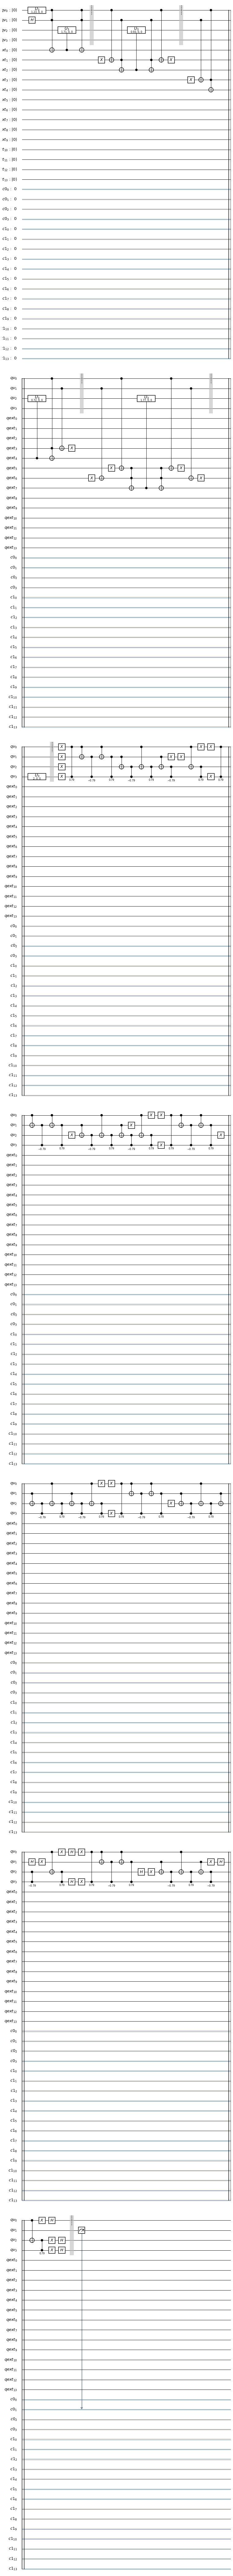

In [9]:
circuit.draw(output='mpl',scale=0.5)

In [10]:
backend = IBMQ.get_backend('ibmq_qasm_simulator')
backend.name()
job = execute(circuit, backend,shots=5000)
job_monitor(job, interval=5)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [11]:
counts=job.result().get_counts(circuit)
job.result().get_counts(circuit)

{'00000000000000 0000': 2722, '00000000000000 0010': 2278}

From the measurements, it is possible to conclude that the action $a_0$ has the biggest coefficient. So the action chosen by the agent will be the first. The values are not exactly that theoretically expected but the difference can be justified by the fact that the Grover algorithm is only probabilistic and gives us the result only with a certain percentage certainty. 
The initial state of Bayesian Network after applying the utility function can be found in the "Quantum Bayesian Decisions(Initial_State)" file, and the hole state after applying the Grover algorithm in the "Quantum Bayesian Decisions  Verification" file. The second file also allows looking at the states that should not be present and change the final outcome.

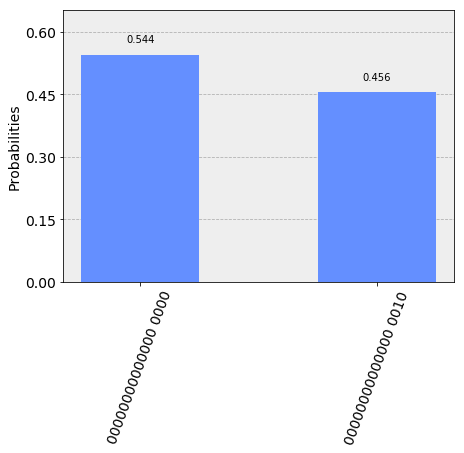

In [12]:
plot_histogram(counts)